<a href="https://colab.research.google.com/github/rafaelalmeida12/Projetos_Data_Science/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Titanic : O hello world do  Data Science

Este é um dos desafio mais conhecidos do site [Kaggle](https://https://www.kaggle.com/) e também famoso por ser o hello world para quem esta iniciando no mundo do data science .

A competição é simples: usa o aprendizado de máquina para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic.

Como todo bom analista a primeira coisa a se fazer e conhecer a regra de negócio com qual dados você está trabalhando e aplicar um chechlist de tarefas , etapas para que seu projeto seja realizado .

 **Checklist**

1.  Definição do Problema
2.  Obtenção dos Dados
3.  Exploração dos Dados
4.  Preparação dos Dados
5.  Construção do Modelo
6.  Avaliação

**1.Definição do Problema**

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.









**2.Obtenção dos Dados**

Para participar do desafio você precisará cadastras no [Kaggle](https://https://www.kaggle.com/) após o cadastro poderá participar do desafio e baixar os dados 
[Desafio Titanic](https://https://www.kaggle.com/c/titanic/data).

![Site]('kage.jpg')

Como IDE (Ambiente de desenvolvimento integrado) para exploração dos dados usaremos o Google Colab .

**3.Exploração dos Dados**

Documentação das bibliotecas:

[Pandas](https://pandas.pydata.org/docs/)

[matplotlib](https://matplotlib.org/)

[seaborn](https://seaborn.pydata.org/)

[numpy](https://numpy.org/doc/)

In [0]:
#Importando as bibliotecas que iremos utilizar 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
#Importar nossos arquivos com o Pandas 
treino= pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [0]:
# Verificar se possui dados nulo 
treino.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Foi verificado que a base de dados não está 100% completa a coluna 'Age',       'Cabin' e  'Embarked'   possui alguns dados nulos.
À varias formas de tratar dados nulos , você pode excluir as linhas , que não seria uma boa ideia dependendo do seu caso excluir uma linha so por causa de uma coluna , ou pode se aplicar funções matemáticas como (Média,Media,Valor mais recorrente). Cabe a você como Data Science procurar a melhor destre as opções.  

In [0]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


O describe é uma função que aplica funções matemáticas em cada coluna podemos vê que temos 891 passageiros a metade deles equivale a 446 e demais .

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf5bb99358>,
      dtype=object)

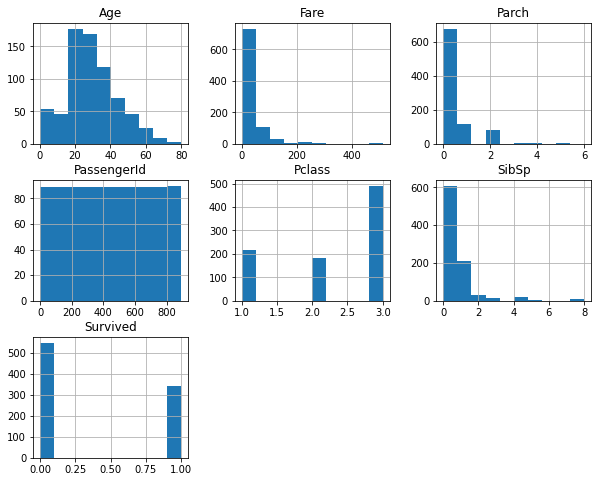

In [0]:
treino.hist(figsize=(10,8))

Com o histograma por classe podemos vê a variação de cada classe como por exemplo em idade temos um pico entre 18 a 25 anos.

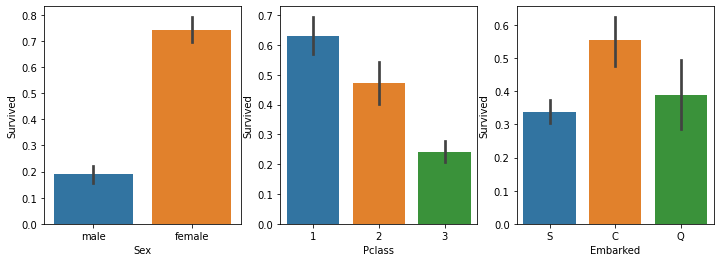

In [0]:
fig, (axis1,axis2,axis3)=plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=treino, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=treino, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=treino, ax=axis3)

No barplot comparando com sobrevivente já conseguimos responder algumas perguntas realizadas acima .

No primeiro gráfico podemos ver que á três vezes mais mulheres sobreviventes que os homens e que a maioria deles como visto no segundo gráfico são pertencentes a 1° Classe e que embarcaram em C......

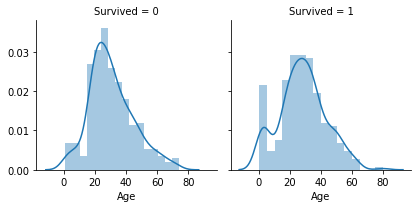

In [0]:
age_survived=sns.FacetGrid(treino,col='Survived')
age_survived.map(sns.distplot,'Age')

Neste grafico tiramos um insight que no grafico de sobreviventes a um grande pico na idade infantil , predizendo que tiveram também uma prioridade .

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf5893d0f0>,
      dtype=object)

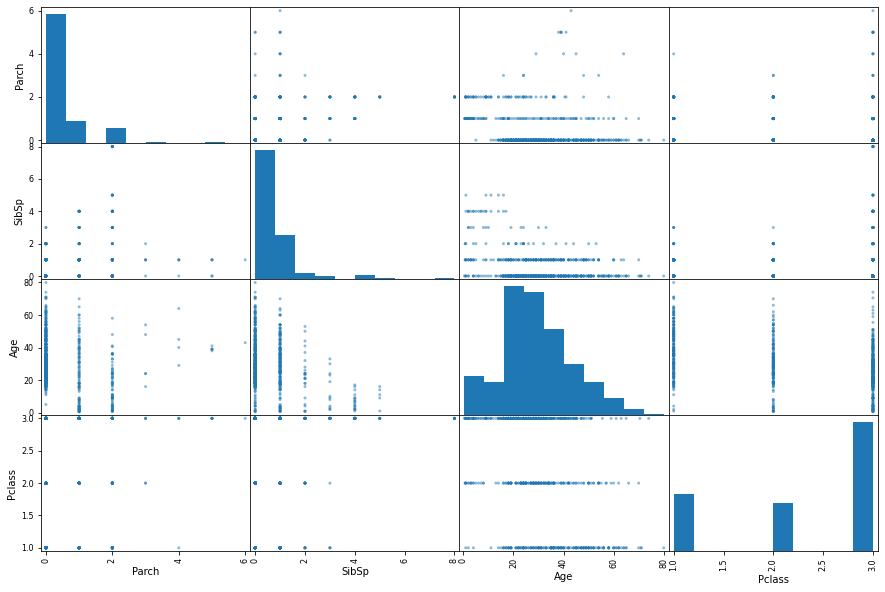

In [0]:
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(treino[columns],figsize=(15,10))

Este gráfico a primeira visto pode ser muito confuso por ele se comporta de forma diferente é visto em linhas , mais nele podemos tirar algumas conclusões também.
Olhando para a coluna de idade 'Age' com a classe 'PcLass' temos um volume maior de idosos na 1° classe e na 3° o pessoal mais jovem .

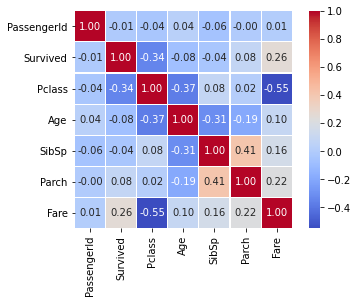

In [0]:
sns.heatmap(treino.corr(),cmap='coolwarm',fmt='.2f',linewidths=0.1,vmax=1.0,square=True,linecolor='white',annot=True)

In [0]:
treino_idx= treino.shape[0]
teste_idx=teste.shape[0]

In [0]:
passageiroId=teste['PassengerId']
passageiroId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [0]:
target= treino.Survived.copy()
treino.drop(['Survived'],axis=1,inplace=True)
treino

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
df_merged= pd.concat(objs=[treino,teste],axis=0).reset_index(drop=True)
print('df_merged.shape:({}x{})'.format(df_merged.shape[0],df_merged.shape[1]))

df_merged.shape:(1309x11)


In [0]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [0]:
age_median=df_merged['Age'].median()
df_merged['Age'].fillna(age_median,inplace=True)

In [0]:
fare_median=df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median,inplace=True)

In [0]:
embarked_top=df_merged['Embarked'].value_counts()[0]
embarked_top

914

In [0]:
df_merged['Embarked'].fillna(embarked_top,inplace=True)

In [0]:
df_merged.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
df_merged['Sex']=df_merged['Sex'].map({'male':0,'female':1})

In [0]:
embarked_dummies=pd.get_dummies(df_merged['Embarked'],prefix='Embarked')
df_merged=pd.concat([df_merged,embarked_dummies],axis=1)
df_merged.drop('Embarked',axis=1,inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [0]:
train= df_merged.iloc[:treino_idx]
test= df_merged.iloc[treino_idx:]

# Modelo de Regressão Logística

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [0]:
lr_model=LogisticRegression(solver='liblinear')
lr_model.fit(train,target)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
acc_logReg=round(lr_model.score(train,target)*100,2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [0]:
pred_lr=lr_model.predict(test)

submission=pd.DataFrame({
    "PassengerId":passageiroId,
    "Survived":pred_lr
})

submission.to_csv('submission_tree.csv',index=False)


In [0]:
tree_model= DecisionTreeClassifier(max_depth=3)
tree_model.fit(train,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
acc_tree=round(tree_model.score(train,target)*100,2)

print('Acurácia do modelo de Árvore de Decisão: {}'.format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [0]:

y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passageiroId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('submission_tree2.csv', index=False)

In [0]:
rafael_almeida=np.array([2,0,24,1,1,32.2,0,0,0,1]).reshape((1,-1))
jessica_veloso=np.array([2,1,22,1,1,32.2,0,0,0,1]).reshape((1,-1))

In [0]:
print("Rafael Almeida:\t{}".format(tree_model.predict(rafael_almeida)[0]))
print("Jessica:\t{}".format(tree_model.predict(jessica_veloso)[0]))

Rafael Almeida:	0
Jessica:	1
